In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu

In [ ]:
# Parameters to make figures work better with illustrator 
import matplotlib 
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = 'Arial'


# Looking at cytosolic screen hydrophobics

In [3]:
# Data from:
# A complete map of human cytosolic degrons and their relevance for disease 
# Voutsinos V, Johansson KE, Larsen FB, Grønbæk-Thygesen M, Jonsson N et al. (2025)
data = pd.read_csv("../../Data/degron_data.csv")

In [ ]:
# Define AA sets
positives = ["R", "K"]
negatives = ["D", "E"]

hydrophobics = ["M", "I", "L", "V", "A", "F", "Y", "W"]
hydrophobic_subset = ["I", "L", "F", "Y", "W"] # This subset removes AAs that were key important in their screen

In [267]:
def mann_whitney_test(column1, column2, data):
    group1 = data[data[column1]]['abundance_score'].dropna()
    group2 = data[data[column2] & ~data[column1]]['abundance_score'].dropna()
    stat, p = mannwhitneyu(group1, group2, alternative="less")
    return p

In [ ]:
# Define functions to identify adjacent amino acids in sequence

def contains_three(seq, aa_set):
    for i in range(len(seq)-5):
        if seq[i] in aa_set:
            if seq[i+1] in aa_set:
                if seq[i+2] in aa_set:
                    return True
    return False

def contains_two(seq, aa_set):
    for i in range(len(seq)-3):
        if seq[i] in aa_set:
            if seq[i+1] in aa_set:
                return True
    return False


def contains_one(seq, aa_set):
    for i in range(len(seq)-1):
        if seq[i] in aa_set:
            return True
    return False

In [ ]:
# Identify properties of each sequence
data["ends_w_charge"] = [(s[-1] in positives) | (s[-1] in negatives) for s in data["aa"]]
data["ends_w_hydrophobic"] = [(s[-1] in hydrophobics) for s in data["aa"]]
data["ends_w_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) for s in data["aa"]]

data["ends_w_two_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) for s in data["aa"]]
data["ends_w_two_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) for s in data["aa"]]
data["ends_w_two_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) for s in data["aa"]]

data["ends_w_three_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) & ((s[-3] in positives) | (s[-3] in negatives)) for s in data["aa"]]
data["ends_w_three_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) & (s[-3] in hydrophobics) for s in data["aa"]]
data["ends_w_three_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) & (s[-3] in hydrophobic_subset) for s in data["aa"]]

data["contains_three_hydrophobic"] = [contains_three(s, hydrophobics) for s in data["aa"]]
data["contains_two_hydrophobic"] = [contains_two(s, hydrophobics) for s in data["aa"]]
data["contains_hydrophobic"] = [contains_one(s, hydrophobics) for s in data["aa"]]

data["contains_three_subset_hydrophobic"] = [contains_three(s, hydrophobic_subset) for s in data["aa"]]
data["contains_two_subset_hydrophobic"] = [contains_two(s, hydrophobic_subset) for s in data["aa"]]
data["contains_subset_hydrophobic"] = [contains_one(s, hydrophobic_subset) for s in data["aa"]]

In [273]:
# Are sequences that end in hydrophobic less abundance than those containing hydrophobics? 
mann_whitney_test('ends_w_hydrophobic','contains_hydrophobic', data)

6.292270833058275e-283

In [276]:
# If we do not consider M, V, and A
# are sequences that end in hydrophobic less abundance than those containing hydrophobics?
mann_whitney_test('ends_w_subset_hydrophobic','contains_subset_hydrophobic', data)

7.786314093349562e-77

In [278]:
# Are sequences that end in two hydrophobics less abundance than those containing two adjacent hydrophobics? 
mann_whitney_test('ends_w_two_hydrophobic','contains_two_hydrophobic', data)

1.0415945539587412e-177

In [279]:
# If we do not consider M, V, and A
# Are sequences that end in two hydrophobics less abundance than those containing two adjacent hydrophobics? 
mann_whitney_test('ends_w_two_subset_hydrophobic','contains_two_subset_hydrophobic', data)

0.0030014413004801053

In [280]:
# Are sequences that end in three hydrophobics less abundance than those containing three adjacent hydrophobics? 
mann_whitney_test('ends_w_three_hydrophobic','contains_three_hydrophobic', data)

2.8644984554040795e-45

In [281]:
# If we do not consider M, V, and A
# Are sequences that end in three hydrophobics less abundance than those containing three adjacent hydrophobics? 
mann_whitney_test('ends_w_three_subset_hydrophobic','contains_three_subset_hydrophobic', data)

0.7576328051271859

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


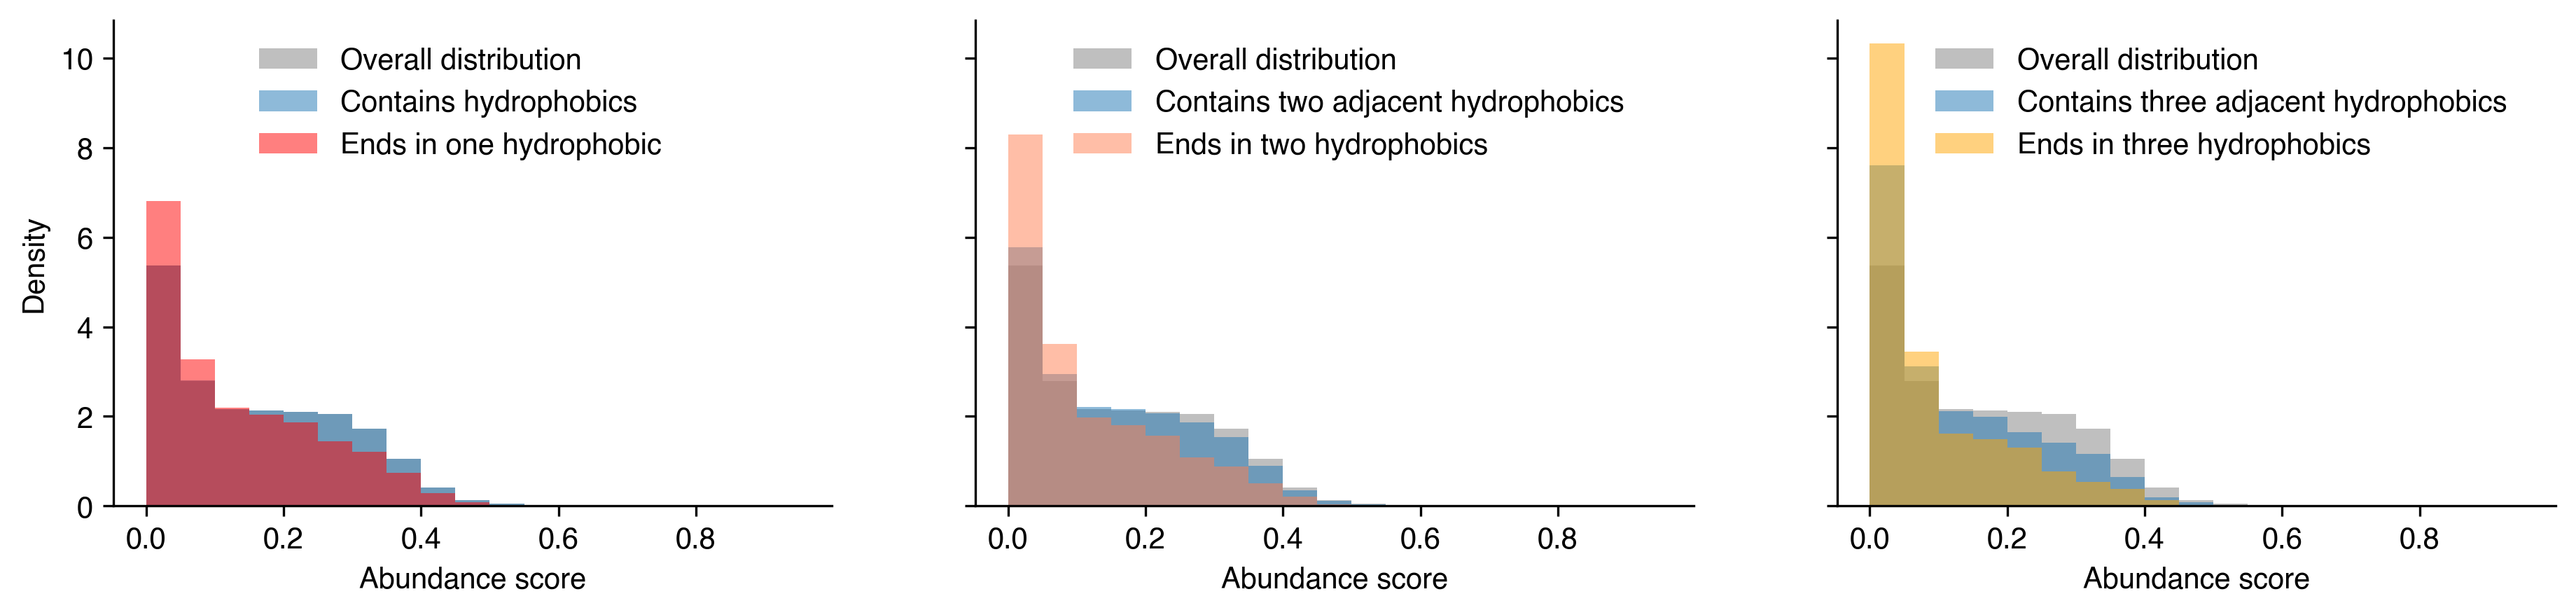

In [282]:
# Plot the abundance distributions for ending with versus containing various amount of hydrophobic residues
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(data[data["contains_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains hydrophobics", bins=np.arange(0, 1, 0.05))
axs[0].hist(data[data["ends_w_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(0.8,1), frameon=False)

axs[1].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(data[data["contains_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[1].hist(data[data["ends_w_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(0.1,1), frameon=False)

axs[2].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(data[data["contains_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains three adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[2].hist(data[data["ends_w_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobics",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../../figures/degron_screen_all.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


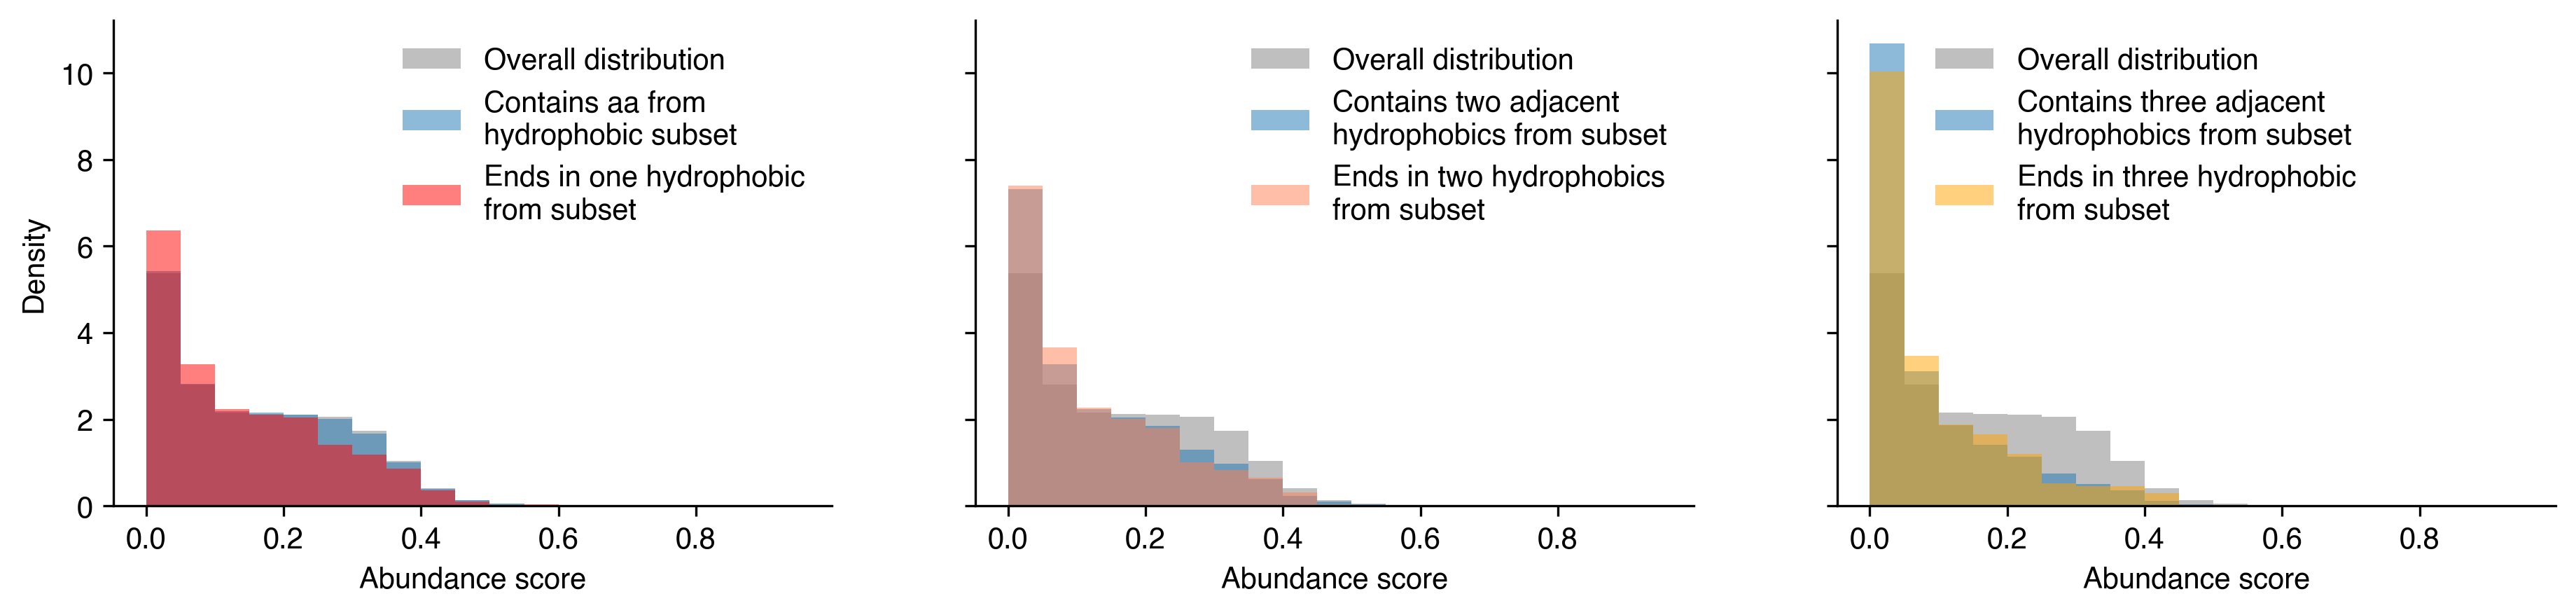

In [ ]:
# If we do not consider M, V, and A
# Plot the abundance distributions for ending with versus containing various amount of hydrophobic residues
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(data[data["contains_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains aa from\nhydrophobic subset ", bins=np.arange(0, 1, 0.05))
axs[0].hist(data[data["ends_w_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic\nfrom subset",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(1,1), frameon=False)

axs[1].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(data[data["contains_two_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent\nhydrophobics from subset", bins=np.arange(0, 1, 0.05))
axs[1].hist(data[data["ends_w_two_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics\nfrom subset",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(1,1), frameon=False)

axs[2].hist(data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(data[data["contains_three_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains three adjacent\nhydrophobics from subset", bins=np.arange(0, 1, 0.05))
axs[2].hist(data[data["ends_w_three_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobic\nfrom subset",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../../figures/degron_screen_subset.pdf", format='pdf', bbox_inches='tight')

# Looking at the second degron screen

In [128]:
# Data from Comprehensive degron mapping in human transcription factors
# Larsen FB, Voutsinos V, Jonsson N, Johansson KE, Ethelberg FD et al. (2025)
TF_data = pd.read_excel("../../Data/TF_degron_screen.xlsx")

In [ ]:
# Defining the sequence features
TF_data["ends_w_charge"] = [(s[-1] in positives) | (s[-1] in negatives) for s in TF_data["aa"]]
TF_data["ends_w_hydrophobic"] = [(s[-1] in hydrophobics) for s in TF_data["aa"]]
TF_data["ends_w_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) for s in TF_data["aa"]]

TF_data["ends_w_two_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) for s in TF_data["aa"]]
TF_data["ends_w_two_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) for s in TF_data["aa"]]
TF_data["ends_w_two_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) for s in TF_data["aa"]]

TF_data["ends_w_three_charge"] = [((s[-1] in positives) | (s[-1] in negatives)) & ((s[-2] in positives) | (s[-2] in negatives)) & ((s[-3] in positives) | (s[-3] in negatives)) for s in TF_data["aa"]]
TF_data["ends_w_three_hydrophobic"] = [(s[-1] in hydrophobics) & (s[-2] in hydrophobics) & (s[-3] in hydrophobics) for s in TF_data["aa"]]
TF_data["ends_w_three_subset_hydrophobic"] = [(s[-1] in hydrophobic_subset) & (s[-2] in hydrophobic_subset) & (s[-3] in hydrophobic_subset) for s in TF_data["aa"]]


TF_data["contains_three_hydrophobic"] = [contains_three(s, hydrophobics) for s in TF_data["aa"]]
TF_data["contains_two_hydrophobic"] = [contains_two(s, hydrophobics) for s in TF_data["aa"]]
TF_data["contains_hydrophobic"] = [contains_one(s, hydrophobics) for s in TF_data["aa"]]

TF_data["contains_three_subset_hydrophobic"] = [contains_three(s, hydrophobic_subset) for s in TF_data["aa"]]
TF_data["contains_two_subset_hydrophobic"] = [contains_two(s, hydrophobic_subset) for s in TF_data["aa"]]
TF_data["contains_subset_hydrophobic"] = [contains_one(s, hydrophobic_subset) for s in TF_data["aa"]]

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


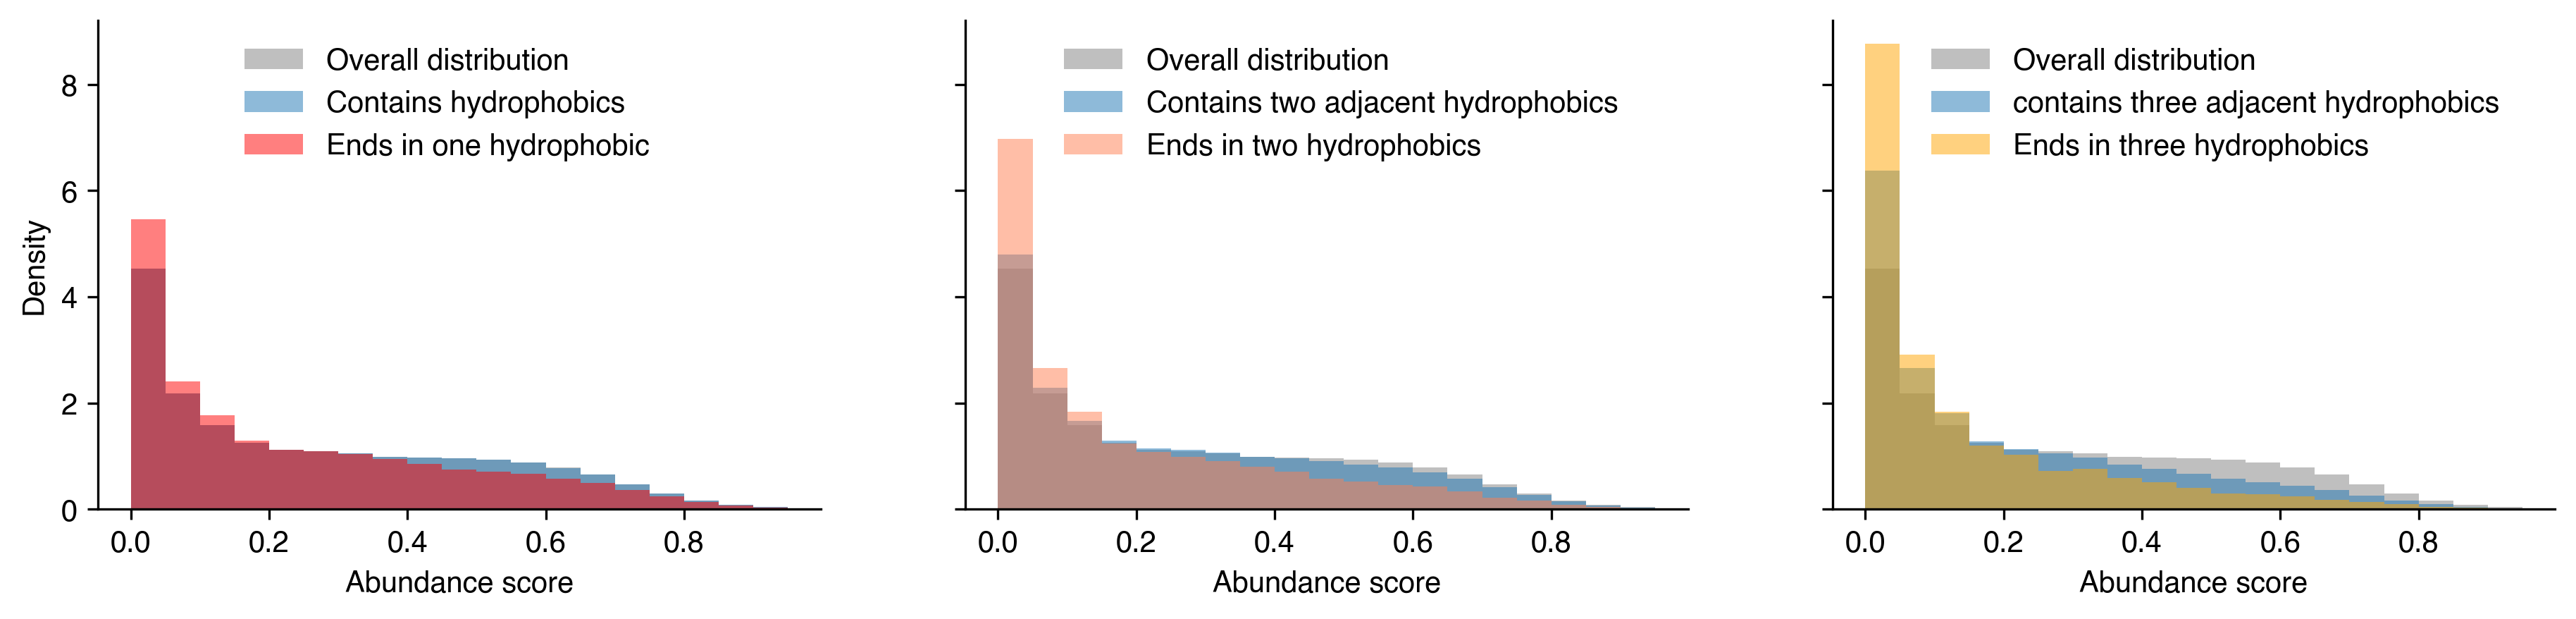

In [ ]:
# Plot the abundance distributions for ending with versus containing various amount of hydrophobic residues
fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(TF_data[TF_data["contains_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains hydrophobics", bins=np.arange(0, 1, 0.05))
axs[0].hist(TF_data[TF_data["ends_w_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(0.8,1), frameon=False)

axs[1].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(TF_data[TF_data["contains_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[1].hist(TF_data[TF_data["ends_w_two_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(0.1,1), frameon=False)

axs[2].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(TF_data[TF_data["contains_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="contains three adjacent hydrophobics", bins=np.arange(0, 1, 0.05))
axs[2].hist(TF_data[TF_data["ends_w_three_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobics",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../../figures/TF_degron_screen_all.pdf", format='pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


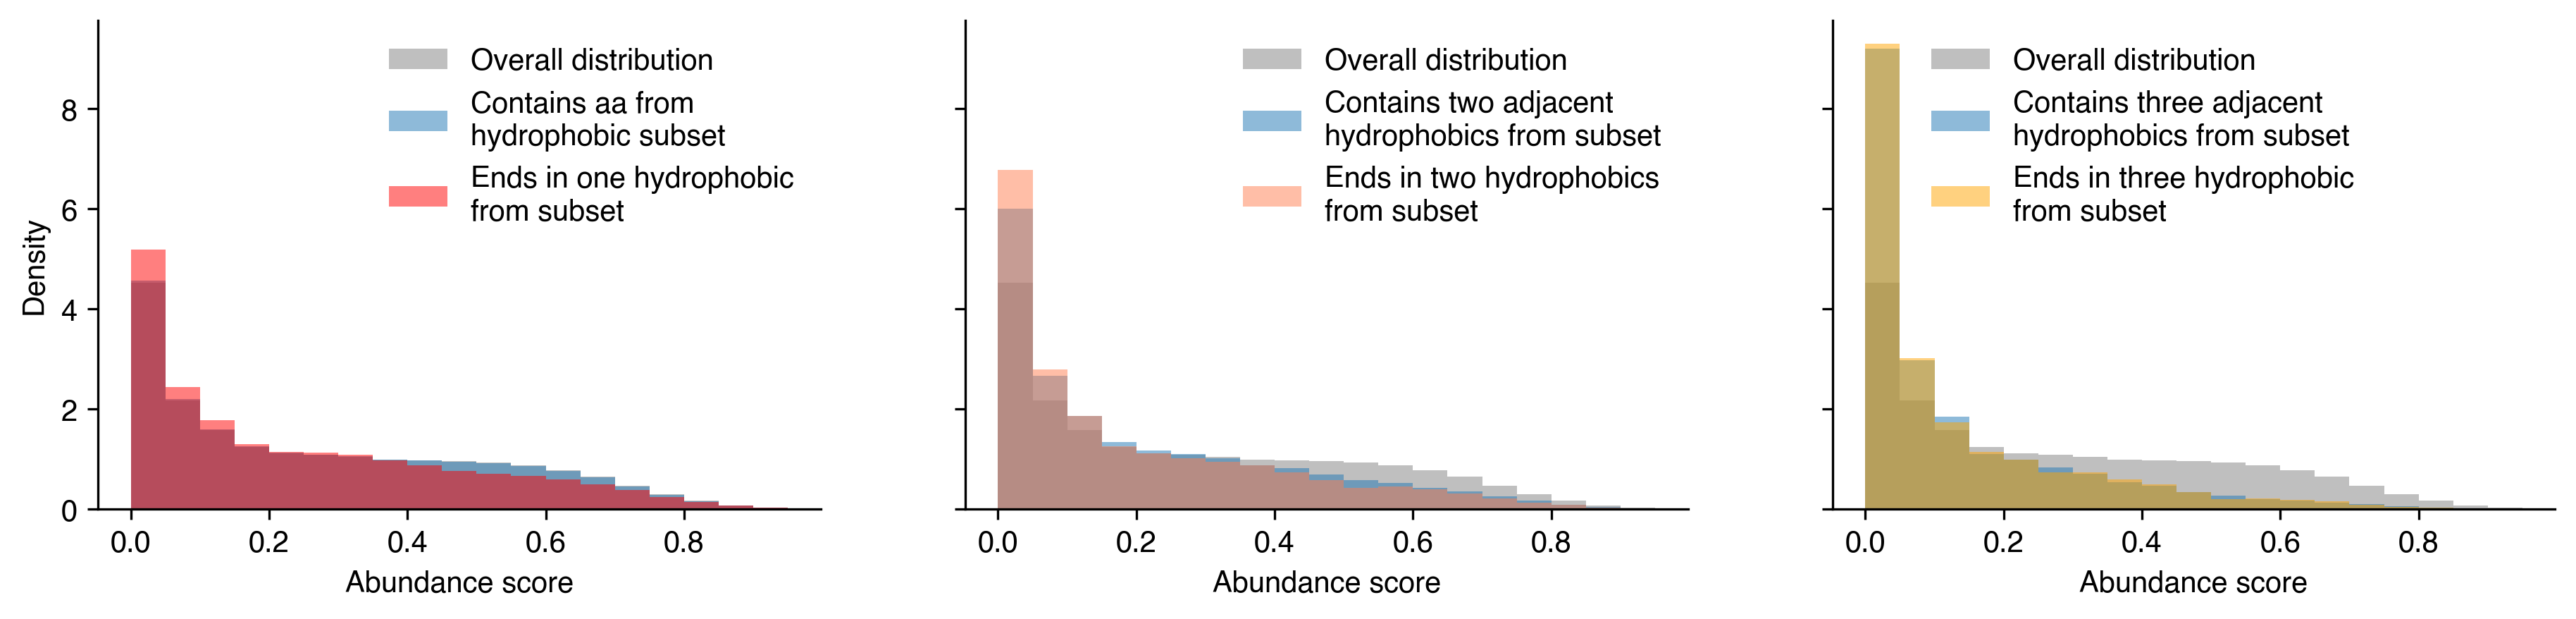

In [ ]:
# If we do not consider M, V, and A
# Plot the abundance distributions for ending with versus containing various amount of hydrophobic residues

fig, axs = plt.subplots(1, 3, figsize=(15,3), sharey=True, sharex=True)
axs[0].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[0].hist(TF_data[TF_data["contains_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains aa from\nhydrophobic subset ", bins=np.arange(0, 1, 0.05))
axs[0].hist(TF_data[TF_data["ends_w_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in one hydrophobic\nfrom subset",  bins=np.arange(0, 1, 0.05), color="red")
axs[0].set_xlabel("Abundance score")
axs[0].set_ylabel("Density")

axs[0].legend(bbox_to_anchor=(1,1), frameon=False)

axs[1].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[1].hist(TF_data[TF_data["contains_two_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains two adjacent\nhydrophobics from subset", bins=np.arange(0, 1, 0.05))
axs[1].hist(TF_data[TF_data["ends_w_two_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in two hydrophobics\nfrom subset",  bins=np.arange(0, 1, 0.05), color="coral")
axs[1].set_xlabel("Abundance score")

axs[1].legend(bbox_to_anchor=(1,1), frameon=False)

axs[2].hist(TF_data["abundance_score"], density=True, label="Overall distribution",  alpha=0.5, bins=np.arange(0, 1, 0.05), color='grey')

axs[2].hist(TF_data[TF_data["contains_three_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Contains three adjacent\nhydrophobics from subset", bins=np.arange(0, 1, 0.05))
axs[2].hist(TF_data[TF_data["ends_w_three_subset_hydrophobic"]]["abundance_score"], density=True, alpha=0.5, label="Ends in three hydrophobic\nfrom subset",  bins=np.arange(0, 1, 0.05), color="orange")
axs[2].set_xlabel("Abundance score")

axs[2].legend(bbox_to_anchor=(0.1,1), frameon=False)

sns.despine()

plt.savefig("../../figures/TF_degron_screen_subset.pdf", format='pdf', bbox_inches='tight')

In [284]:
# Are sequences that end in three hydrophobics less abundance than those containing three adjacent hydrophobics? 
mann_whitney_test('ends_w_three_hydrophobic','contains_three_hydrophobic', TF_data)

8.008101763129695e-242

In [285]:
# If we do not consider M, V and A
# Are sequences that end in three hydrophobics less abundance than those containing three adjacent hydrophobics? 
mann_whitney_test('ends_w_three_subset_hydrophobic','contains_three_subset_hydrophobic', TF_data)

0.01841389680267489

In [ ]:
# Are sequences that end in two hydrophobics less abundance than those containing two adjacent hydrophobics? 
mann_whitney_test('ends_w_two_hydrophobic','contains_two_hydrophobic', TF_data)

0.0

In [287]:
# If we do not consider M, V and A
# Are sequences that end in two hydrophobics less abundance than those containing two adjacent hydrophobics? 
mann_whitney_test('ends_w_two_subset_hydrophobic','contains_two_subset_hydrophobic', TF_data)

7.952425891232677e-41

In [290]:
# Are sequences that end in a hydrophobic less abundance than those containing a hydrophobics? 
mann_whitney_test('ends_w_hydrophobic','contains_hydrophobic', TF_data)

0.0

In [292]:
# If we do not consider M, V and A
# Are sequences that end in a hydrophobic less abundance than those containing a hydrophobics? 
mann_whitney_test('ends_w_subset_hydrophobic','contains_subset_hydrophobic', TF_data)

3.6774667599847105e-230